# **Project 2 Code and Visualizations**

The following code provides the workflow, functions, analysis, and insights into Project 3 for group Ernst Engel

Project Members: Allison Nguyen, Fari Santoso, Katy Qin, Johann Dicken, Shrija Malla, Avani Agarwal 


To run this code you well need the `CFEDemands` python
module.  You may have this already, but if not it  can be installed with a simple:



In [8]:
!pip install -r requirements.txt

  Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached eep153_tools-0.12.4-py2.py3-none-any.whl.metadata (363 bytes)
  Using cached python_gnupg-0.5.4-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
Using cached cfedemands-0.6.4.dev0-py2.py3-none-any.whl (45 kB)
Using cached ConsumerDemands-0.4.3.dev0-py2.py3-none-any.whl (12 kB)
Using cached eep153_tools-0.12.4-py2.py3-none-any.whl (4.9 kB)
Using cached python_gnupg-0.5.4-py2.py3-none-any.whl (21 kB)
Using cached gspread_pandas-3.3.0-py2.py3-none-any.whl (27 kB)
Using cached fsspec-2025.3.2-py3-none-any.whl (194 kB)
  Attempting uninstall: gspread_pandas
    Found existing installation: gspread-pandas 2.2.3
    Uninstalling gspread-pandas-2.2.3:
      Successfully uninstalled gspread-pandas-2

### Data Setup



In [9]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

In [10]:
Uganda_Data = '1yFWlP5N7Aowaj6t2roRSFFUC50aFD-RLBGfzGtqLl0w'
Tanzania_Data = '1tlNUxe2hY2DAOsv6u7R7yC_CiBcr05cXXQiRWBlEHEo'
Senegal_Data = '1cCszXB2Irc1Dp9zyIQgeu4OVWy9ZqvJbTielK8h9PLk'
Mali_Data = '1FnbKj5gwoAQb0QSunBQmyExHwaiLEAdAFCxL59SWLyg'

In [11]:
mali_sheet_names = {
        "expenditures": "Food Expenditures (2018-19)",
        "prices": "Food Prices (2018-19)",
        "household": "Household Characteristics"
    }

In [12]:
def load_country_data(sheet_key, sheet_names = None):

    if sheet_names == None:
        sheet_names = {
        "expenditures": "Food Expenditures (2019-20)",
        "prices": "Food Prices (2019-20)",
        "household": "Household Characteristics"
        }

    # Read expenditures
    x = read_sheets(sheet_key, sheet=sheet_names["expenditures"])
    x = x.set_index(['i','t','m','j']).squeeze()

    # Read prices
    p = read_sheets(sheet_key, sheet=sheet_names["prices"]).set_index(['t','m','j','u'])
    p = p.groupby(['t','m','j','u']).median()  # Median price
    p.index = p.index.set_levels(p.index.levels[-1].str.lower(), level='u')

    p = p.xs('kg', level='u').squeeze().unstack('j')  # Just kg prices
    common_goods = p.columns.intersection(x.index.levels[-1])
    p = p[common_goods].T


    # Read household characteristics
    d = read_sheets(sheet_key, sheet=sheet_names["household"])
    d.columns.name = 'k'
    d = d.replace(np.nan, 0)  # Fill blanks with zero

    #filter data
    

    # Process expenditures
    x = x.T.groupby(['i','t','m','j']).sum()
    x = x.replace(0, np.nan)  # Replace zero with missing
    y = np.log(x)  # Take logs

    d.set_index(['i','t','m'], inplace=True)

    return x, y, p, d


In [13]:
x_uganda, y_uganda, p_uganda, d_uganda = load_country_data(Uganda_Data)
x_tanzania, y_tanzania, p_tanzania, d_tanzania = load_country_data(Tanzania_Data)
x_mali, y_mali, p_mali, d_mali = load_country_data(Mali_Data, sheet_names = mali_sheet_names)
x_senegal, y_senegal, p_senegal, d_senegal = load_country_data(Senegal_Data)
d_senegal = d_senegal.drop(columns = ["men", "women", "girls", "boys"])

Here are household characteristics $d$ of each of the 4 countries



In [14]:
d_uganda.head(2)

,,k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.609438
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.098612


In [15]:
d_tanzania.head(2)

k                                Males 00-03  Females 00-03  Males 04-08  \
i        t       m                                                         
0001-001 2012-13 Mainland Rural            0              0            0   
         2014-15 Mainland Rural            0              0            0   

k                                Females 04-08  Males 09-13  Females 09-13  \
i        t       m                                                           
0001-001 2012-13 Mainland Rural              0            0              0   
         2014-15 Mainland Rural              0            0              0   

k                                Males 14-18  Females 14-18  Males 19-30  \
i        t       m                                                         
0001-001 2012-13 Mainland Rural            0              0            4   
         2014-15 Mainland Rural            0              0            1   

k                                Females 19-30  Males 31-50  Females 31-50  \
i        t       m                                                           
0001-001 2012-13 Mainland Rural              0            0              0   
         2014-15 Mainland Rural              0            1              0   

k                                Males 51-99  Females 51-99  log HSize  
i        t       m                                                      
0001-001 2012-13 Mainland Rural            2              2   2.079442  
         2014-15 Mainland Rural            1              1   1.386294

In [16]:
d_mali.head(2)

,,k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,M NA,log HSize,F NA
i,t,m,,,,,,,,,,,,,,,,,
1001,2017-18,Kayes,0.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.197225,0.0
1002,2017-18,Kayes,3.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.484907,0.0


In [17]:
d_senegal.head(2)

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
11011,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
110110,2018,ziguinchor,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1.386294


# Data Filtering
Our population concerns households with at least one elderly male and female. Based on the data we define elderly as aged 51 and older. 

In [66]:
def filter_data (df, on = ["Females 51-99", "Males 51-99"]):
    df_filtered = df[(df[on[0]] >= 1) | (df[on[1]] >= 1)]
    cols_to_check = [col for col in df.columns if col not in on and "log" not in col.lower()]

    others_zero = (df_filtered[cols_to_check] == 0).all(axis=1)
    df_filtered = df_filtered[others_zero]
    return df_filtered

In [67]:
d_uganda_filter = filter_data(d_uganda)
d_tanzania_filter = filter_data(d_tanzania)
d_senegal_filter = filter_data(d_senegal)
d_mali_filter = filter_data(d_mali, on = ["F 51+", "M 51+"])

In [68]:
filter_data(d_senegal)

,,k,Males 00-03,Females 00-03,Males 04-08,Females 04-08,Males 09-13,Females 09-13,Males 14-18,Females 14-18,Males 19-30,Females 19-30,Males 31-50,Females 31-50,Males 51-99,Females 51-99,log HSize
i,t,m,,,,,,,,,,,,,,,
11011,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
111,2018,dakar,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.693147
11104,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000
111611,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
11169,2018,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2019,dakar,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
2881,2019,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000000
2921,2019,ziguinchor,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.693147


Filtered Data Frames

In [1]:
#ALLISON CODE ENDS HERE

Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [18]:
y_uganda.head()

i                                 t        m         j              
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Beans (dry)         9.392662
                                                     Beef               10.239960
                                                     Beer                9.169518
                                                     Cabbage (green)     6.907755
                                                     Cassava (fresh)     8.294050
Name: Expenditure, dtype: float64

### Estimation



Let $y_{i}^j$ be log expenditures on food $j$ by household $i$ at a particular time.  We want to estimate a regression that takes the form
$$
      y^j_{i} = A^j(p) + \gamma_j'd_i + \beta_j w_i + \zeta^j_i.
$$
We have data on `y` (log expenditures) and `d` (household characteristics).  This leaves the rest of the elements for us to estimate.



#### Basic Estimation



Just one line to set up the regression:



In [19]:
from cfe import Regression

result_uganda = Regression(y=y_uganda,d=d_uganda)
result_tanzania = Regression(y=y_tanzania,d=d_tanzania)
result_senegal = Regression(y=y_senegal,d=d_senegal)
result_mali = Regression(y=y_mali,d=d_mali)

And then one line to predict expenditures and estimate most of the things we need:



In [20]:
result_uganda.predicted_expenditures()

i                                 t        m         j                     
0007d1f1449242feb5a25429644fb991  2019-20  Northern  Avocado                    1836.603231
                                                     Beans (dry)                8530.391173
                                                     Beans (fresh)              4828.283261
                                                     Beef                      15788.755164
                                                     Bogoya                     4770.257706
                                                                                   ...     
ffec87c6ae87498f956723afe69266b9  2019-20  Eastern   Sweet Potatoes (fresh)     8625.903421
                                                     Tea (leaves)                218.108367
                                                     Tomatoes                   1543.016198
                                                     Waragi                     4677.821554
    

Now we can compare predicted log expenditures with actual:



<Axes: xlabel='yhat', ylabel='y'>

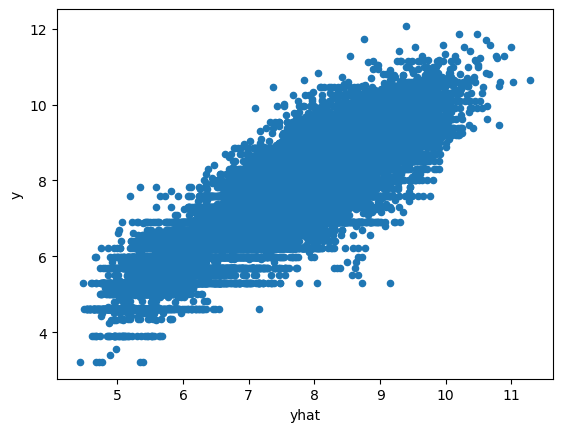

In [21]:
%matplotlib inline
df = pd.DataFrame({'y':y_uganda,'yhat':result_uganda.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.



#### Parameters



##### (Relative) Income Elasticity



Some of the parameters have an interesting interpretation.  First among these are the $\beta$ coefficients, which govern how *income elastic* different goods are (higher values means more elastic).  These are also called *Frisch elasticities*.
Here we use a plot to visualize, with confidence intervals.



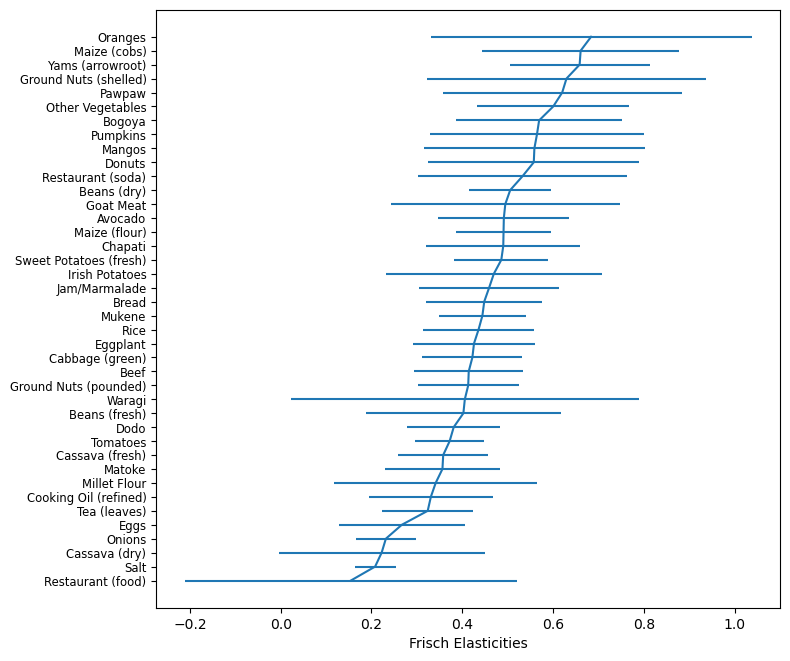

In [22]:
ax = result_uganda.graph_beta()

To just see the values of $\beta$:



In [78]:
gamma_uganda = result_uganda.get_beta()

j
Beans (dry)        0.507084
Cassava (fresh)    0.293750
Dodo               0.186918
Matoke             0.506923
Onions             0.274147
Salt               0.073817
Tea (leaves)       0.113865
Tomatoes           0.076730
Name: beta, dtype: float64

##### Demand and Household Composition



We&rsquo;re particularly interested in the effects of household composition on demand.  These are captured by the $\gamma_j$ parameters in the regression.



In [27]:
gamma_uganda = result_uganda.get_gamma()[["Females 51-99", "Males 51-99"]]
gamma_tanzania = result_tanzania.get_gamma()[["Females 51-99", "Males 51-99"]]
gamma_mali = result_mali.get_gamma()[["F 51+", "M 51+"]]
gamma_senegal = result_senegal.get_gamma()[["Females 51-99", "Males 51-99"]]

# Gamma Visualizations

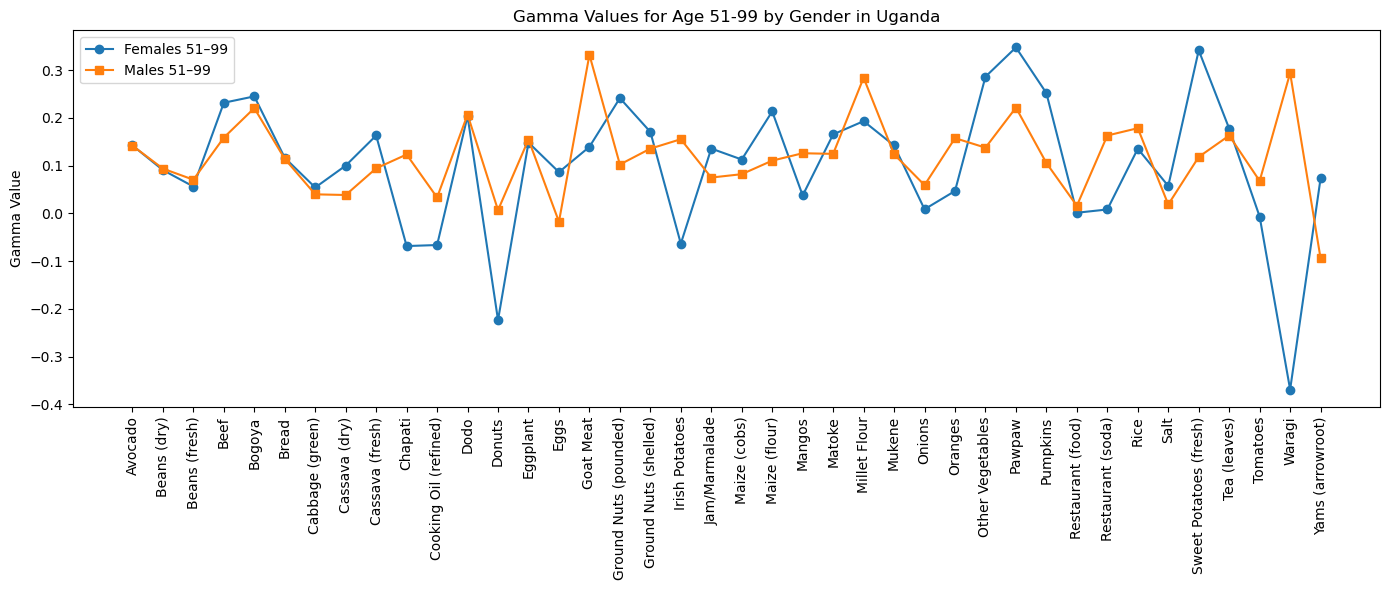

In [32]:
import matplotlib.pyplot as plot
plot.figure(figsize=(14, 6))
x = range(len(gamma_uganda))

plot.plot(x, gamma_uganda["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_uganda["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_uganda.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Uganda")
plot.legend()
plot.tight_layout()
plot.show()

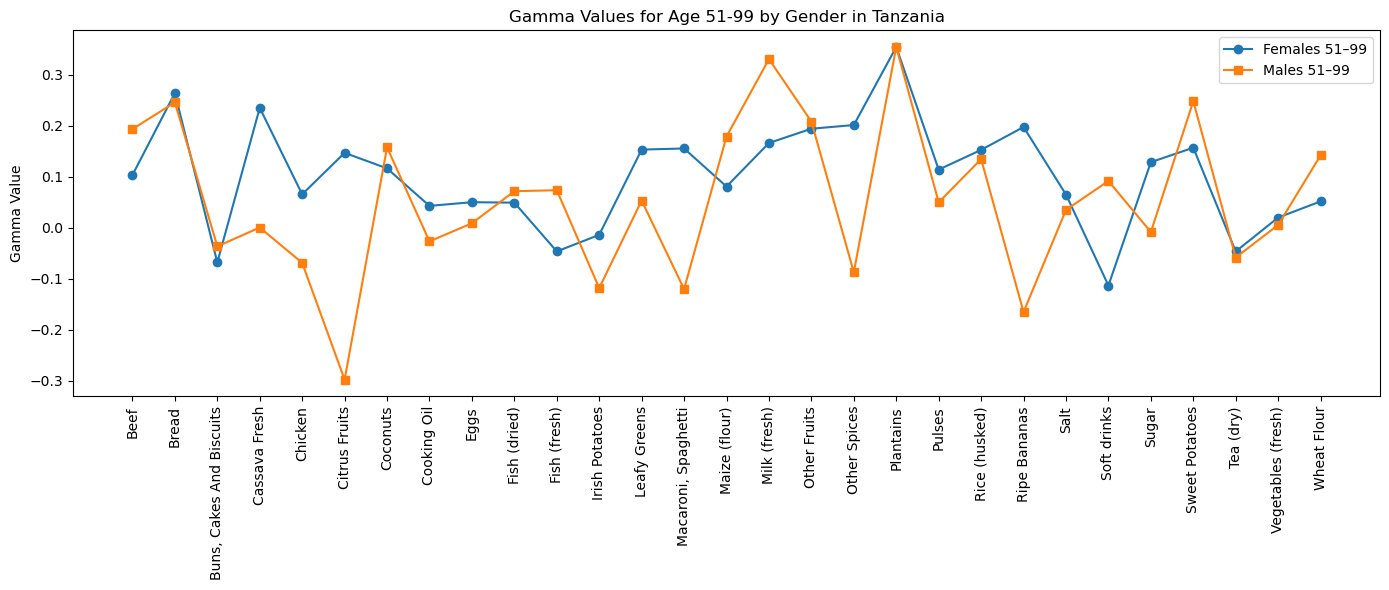

In [33]:
plot.figure(figsize=(14, 6))
x = range(len(gamma_tanzania))

plot.plot(x, gamma_tanzania["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_tanzania["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_tanzania.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Tanzania")
plot.legend()
plot.tight_layout()
plot.show()

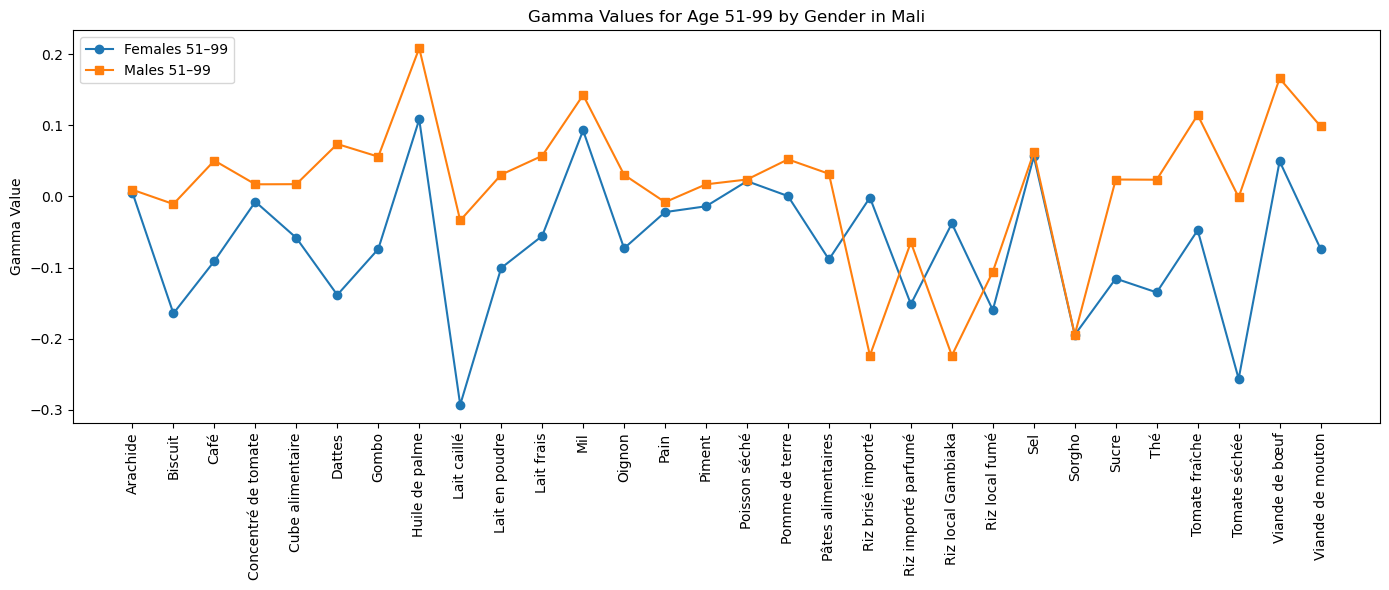

In [36]:
gamma_mali.columns = ["Females 51-99", "Males 51-99"]

plot.figure(figsize=(14, 6))
x = range(len(gamma_mali))

plot.plot(x, gamma_mali["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_mali["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_mali.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Mali")
plot.legend()
plot.tight_layout()
plot.show()

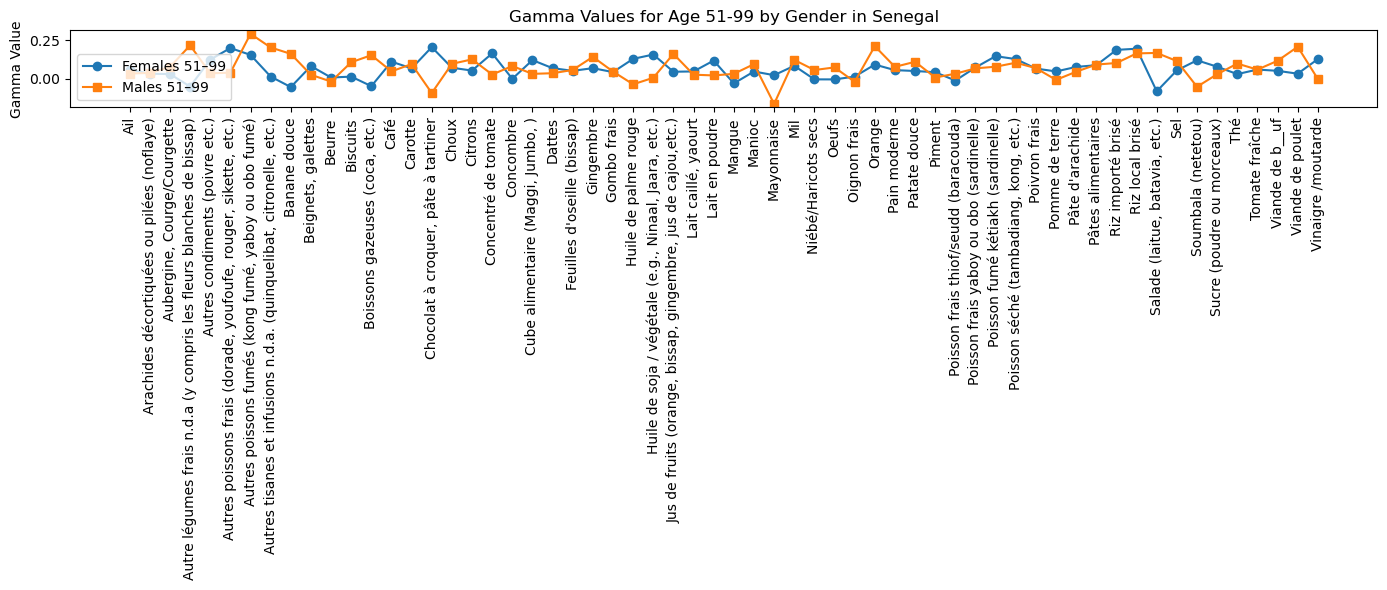

In [35]:
plot.figure(figsize=(14, 6))
x = range(len(gamma_senegal))

plot.plot(x, gamma_senegal["Females 51-99"], marker='o', label="Females 51–99")
plot.plot(x, gamma_senegal["Males 51-99"], marker='s', label="Males 51–99")
plot.xticks(ticks=x, labels=gamma_senegal.index, rotation=90)

plot.ylabel("Gamma Value")
plot.title("Gamma Values for Age 51-99 by Gender in Senegal")
plot.legend()
plot.tight_layout()
plot.show()

In [ ]:
def sort_gammas(df):
    

Having estimated the demand system, we can examine the implied demand curves.



##### Budgets



Get food budget for all households, then find median budget:



In [29]:
import numpy as np

xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

NameError: name 'result' is not defined

##### Reference Prices



Choose reference prices.  Here we&rsquo;ll choose a particular year, and average prices across markets.  If you wanted to focus on particular market you&rsquo;d do this differently.



In [1]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar = p.mean(axis=1)
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar = pbar.replace(np.nan,1)

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,j,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

##### Demand as a function of prices



Let&rsquo;s take a look at demand schedules for households with different budgets.



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

use = 'Millet Flour'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Millet for household at median budget
plt.plot([result.demands(xref,my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

##### Engel Curves



Engel curves trace out how demand changes with budget:



In [1]:
fig,ax = plt.subplots()

ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f}')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

##### Indirect Utility



We can also describe an indirect utility function that corresponds to these demands:



In [1]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')